<a href="https://colab.research.google.com/github/dho619/TCC_Pos_IA/blob/main/AnaliseExploracaoDosDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('./Walmart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [79]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo TratamentoDosDados.ipynb
def TratarDadosBaseWalmart(df):
  df.Date=pd.to_datetime(df.Date)
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df.drop(['Date'], axis=1, inplace=True)

  df.drop_duplicates(inplace=True)

  ignoreFeatures = ['Weekly_Sales', 'Day']
  maximumToBeCategorical = 45
  features = [i for i in df.columns if i not in ignoreFeatures]
  uniqueValuesForFeature = df[features].nunique().sort_values()
  categoricalFeature = [];
  valuesFeature = [];
  for i in range(df[features].shape[1]):
      if uniqueValuesForFeature.values[i]<=maximumToBeCategorical:
          categoricalFeature.append(uniqueValuesForFeature.index[i])
      else:
          valuesFeature.append(uniqueValuesForFeature.index[i])
  for i in categoricalFeature:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], prefix=str(i)))],axis=1)
    
  return df

In [80]:
df_original = df.copy(deep=True)
df = TratarDadosBaseWalmart(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  6435 non-null   float64
 1   Holiday_Flag  6435 non-null   uint8  
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   Day           6435 non-null   int64  
 7   Year_2010     6435 non-null   uint8  
 8   Year_2011     6435 non-null   uint8  
 9   Year_2012     6435 non-null   uint8  
 10  Month_1       6435 non-null   uint8  
 11  Month_2       6435 non-null   uint8  
 12  Month_3       6435 non-null   uint8  
 13  Month_4       6435 non-null   uint8  
 14  Month_5       6435 non-null   uint8  
 15  Month_6       6435 non-null   uint8  
 16  Month_7       6435 non-null   uint8  
 17  Month_8       6435 non-null   uint8  
 18  Month_9       6435 non-null 

In [99]:
df2 = df_original[['Date', 'Weekly_Sales']]
df2.Date=pd.to_datetime(df2.Date)
df2['MonthYear'] = df2.Date.dt.to_period('M').astype(str)
df2.sort_values(by=['MonthYear'],inplace=True)
df2['MonthYear'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

array(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'],
      dtype=object)

In [101]:
df2.groupby(['MonthYear']).sum()['Weekly_Sales']/1000000

MonthYear
2010-01     42.239876
2010-02    191.586881
2010-03    186.226221
2010-04    183.811789
2010-05    280.611884
2010-06    142.436082
2010-07    184.266356
2010-08    184.538086
2010-09    179.704061
2010-10    231.120142
2010-11    158.773134
2010-12    323.571609
2011-01    211.965690
2011-02    187.609204
2011-03    136.520519
2011-04    278.969312
2011-05    182.801667
2011-06    140.193615
2011-07    224.461092
2011-08    188.081027
2011-09    231.032263
2011-10    183.719329
2011-11    253.470323
2011-12    229.375968
2012-01    172.220699
2012-02    142.829599
2012-03    230.739669
2012-04    182.542788
2012-05    142.283042
2012-06    292.388267
2012-07    184.586490
2012-08    191.612587
2012-09    179.795939
2012-10    188.079386
2012-11     46.925879
2012-12     46.128514
Name: Weekly_Sales, dtype: float64

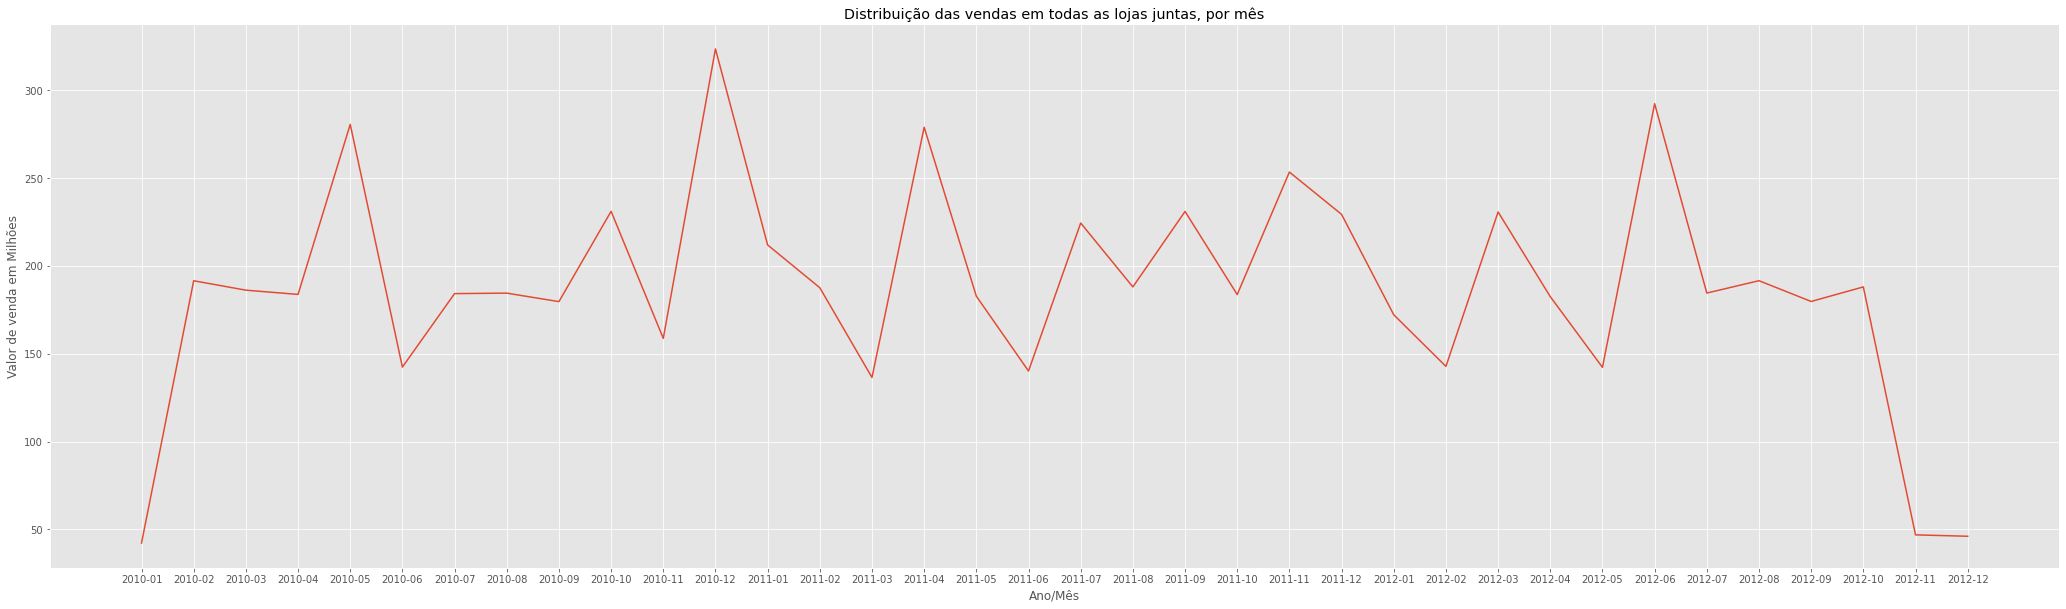

In [100]:
plt.style.use("ggplot")
plt.figure(figsize = (36, 10))
plt.plot(df2['MonthYear'].unique(), df2.groupby(['MonthYear']).sum()['Weekly_Sales']/1000000)
plt.title('Distribuição das vendas em todas as lojas juntas, por mês')
plt.xlabel("Ano/Mês")
plt.ylabel("Valor de venda em Milhões")
plt.show()